In [74]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor



import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
matplotlib.rcParams.update({'font.size': 14})

In [77]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
   
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))

    plt.figure(figsize=(18,10))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

### Пути к директориям и файлам

In [78]:
TRAIN_DATASET_PATH = 'project_task/train.csv' # y_train, y_valid
TEST_DATASET_PATH = 'project_task/test.csv'

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [79]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [80]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


In [81]:
train_df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [82]:
# test_id = test_df["Id"]
# pred_df = pd.DataFrame()
# pred_df["Id"] = test_id
# pred_df["Price"] = np.random.randint(0, 1e6, size=test_id.shape[0])
# assert pred_df.shape[0] == 5000, f"Real pred-shape = {pred_df.shape[0]}, Expected pred-shape = 5000"

# pred_df.to_csv("./predictions_.csv", index=False)

### Разбиение на train и valid

In [83]:
feature_names = ['Id','DistrictId','Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2', 'Price']

#new_feature_names = ['IsDistrictLarge', 'MedPriceByDistrict']

target_name = 'Price'

In [84]:
X = train_df[feature_names]
y = train_df[target_name]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21) # test_size=0.33 ????
X_valid = X_valid.drop('Price', axis=1)

In [85]:
X_train.shape

(6700, 20)

In [86]:
X_valid.shape

(3300, 19)

In [87]:
X_valid.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,3300.000000,3300.000000,3300.000000,3300.000000,2627.000000,3300.000000,3300.000000,3300.000000,3.300000e+03,3300.000000,3300.000000,3300.000000,3300.000000,1721.000000,3300.000000,3300.000000
mean,8302.300303,50.249091,1.906667,56.791432,36.767259,5.938788,8.591515,12.532121,8.060947e+03,0.119095,24.720303,5390.651818,8.214242,1127.380012,1.292424,4.248182
std,4870.111395,43.751064,0.885923,22.205235,19.939261,5.372672,5.283401,6.720317,3.490262e+05,0.117867,17.682859,4065.624981,24.063203,1022.123686,1.457783,4.794717
min,6.000000,0.000000,0.000000,1.136859,1.049867,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,4023.000000,19.000000,1.000000,41.726780,22.860266,1.000000,4.000000,9.000000,1.974000e+03,0.020741,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,8286.500000,36.000000,2.000000,53.300742,33.169951,6.000000,7.000000,12.000000,1.977000e+03,0.075424,25.000000,5273.000000,2.000000,900.000000,1.000000,3.000000
75%,12479.500000,74.000000,3.000000,66.310626,45.754902,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7425.000000,5.000000,1450.000000,2.000000,6.000000
max,16781.000000,208.000000,19.000000,604.705972,410.639749,84.000000,37.000000,99.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


In [88]:
X_train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [89]:
X_train.dtypes.value_counts()

int64      9
float64    8
object     3
dtype: int64

In [90]:
X_train['Id'] = X_train['Id'].astype(str)
X_train['DistrictId'] = X_train['DistrictId'].astype(str)

## Обзор данных

### Целевая переменная

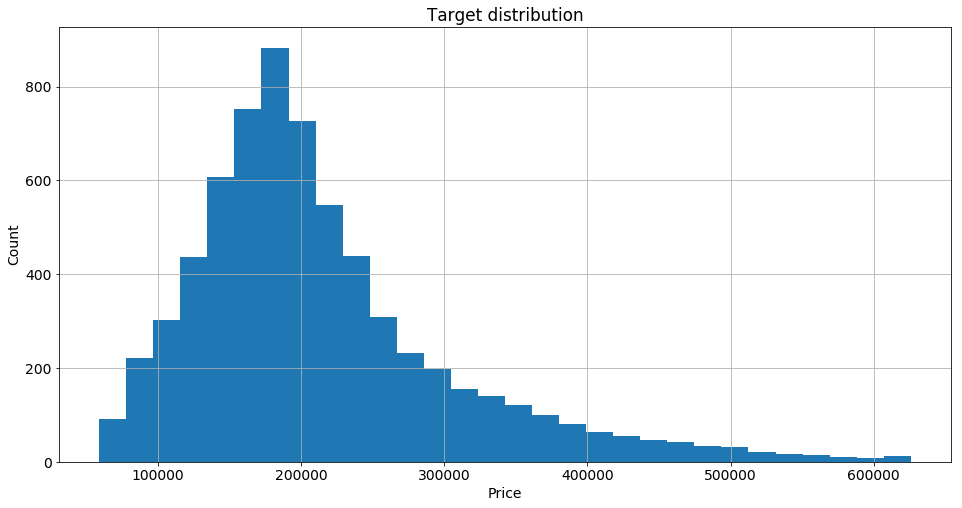

In [91]:
plt.figure(figsize = (16, 8))

X_train['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

### Количественные переменные

In [92]:
X_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,6700.000000,6700.000000,5260.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,3481.000000,6700.000000,6700.000000,6700.000000
mean,1.882537,56.081497,37.415591,6.438060,8.494776,12.647463,1985.154776,0.118740,24.670597,5333.197463,7.952985,1150.579718,1.332836,4.222985,213872.986633
std,0.815633,20.468093,104.661936,34.688095,5.220311,6.803397,40.872731,0.119600,17.459441,3977.675264,23.718438,1021.277009,1.510859,4.812391,92638.972848
min,0.000000,1.988943,0.370619,0.000000,1.000000,0.000000,1912.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.798893,22.711308,1.000000,4.000000,9.000000,1973.000000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153994.680334
50%,2.000000,52.083642,32.505331,6.000000,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192817.509808
75%,2.000000,65.790145,44.768302,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249080.956886
max,10.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,4968.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,625820.041178


In [93]:
X_valid.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,3300.000000,3300.000000,3300.000000,3300.000000,2627.000000,3300.000000,3300.000000,3300.000000,3.300000e+03,3300.000000,3300.000000,3300.000000,3300.000000,1721.000000,3300.000000,3300.000000
mean,8302.300303,50.249091,1.906667,56.791432,36.767259,5.938788,8.591515,12.532121,8.060947e+03,0.119095,24.720303,5390.651818,8.214242,1127.380012,1.292424,4.248182
std,4870.111395,43.751064,0.885923,22.205235,19.939261,5.372672,5.283401,6.720317,3.490262e+05,0.117867,17.682859,4065.624981,24.063203,1022.123686,1.457783,4.794717
min,6.000000,0.000000,0.000000,1.136859,1.049867,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,4023.000000,19.000000,1.000000,41.726780,22.860266,1.000000,4.000000,9.000000,1.974000e+03,0.020741,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,8286.500000,36.000000,2.000000,53.300742,33.169951,6.000000,7.000000,12.000000,1.977000e+03,0.075424,25.000000,5273.000000,2.000000,900.000000,1.000000,3.000000
75%,12479.500000,74.000000,3.000000,66.310626,45.754902,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7425.000000,5.000000,1450.000000,2.000000,6.000000
max,16781.000000,208.000000,19.000000,604.705972,410.639749,84.000000,37.000000,99.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


### Категориальные признаки

In [94]:
def cat_features(df):
    cat_colnames = df.select_dtypes(include='object').columns.tolist()
    for cat_colname in cat_colnames[2:]:
        print(str(cat_colname) + '\n\n' + str(X_train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')
    
    
    return df


### Обработка выбросов

In [95]:
def df_fix(df):
    df.loc[df['Rooms'].isin([0, 10, 19]), 'Rooms'] = df['Rooms'].median()
    df.loc[df['Square'] > df['Square'].quantile(.99), 'Square'] = df['Square'].median()  
    df.loc[df['Square'] < df['Square'].quantile(.01), 'Square'] = df['Square'].median()
    df.loc[df['LifeSquare'].isna(), 'LifeSquare'] = df['LifeSquare'].median()
    df.loc[df['LifeSquare'] > df['LifeSquare'].quantile(.99), 'LifeSquare'] = df['LifeSquare'].median()
    df.loc[df ['LifeSquare'] < df['LifeSquare'].quantile(.01), 'LifeSquare'] = df['LifeSquare'].median()
    df.loc[X_train['KitchenSquare'].isnull(), 'KitchenSquare'] = df['KitchenSquare'].median
    df.loc[X_train['KitchenSquare'] < 3, 'KitchenSquare'] = 3
    df.loc[X_train['KitchenSquare'] > 25, 'KitchenSquare'] = df['KitchenSquare'].median()

    df.loc[df['Square']< df["KitchenSquare"] + df["LifeSquare"], 'Square'] =  df["KitchenSquare"] + df["LifeSquare"]
    df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].median()
    floor_outliers = df[X_train['Floor'] > df['HouseFloor']].index
    df.loc[floor_outliers, 'Floor'] = df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))
    df.loc[X_train['HouseYear'] > 2020, 'HouseYear'] = 2020
    df.loc[X_train['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()
    
    return df
    

In [96]:
X_train['Rooms'].value_counts()

2.0     2633
1.0     2485
3.0     1467
4.0       95
5.0       13
0.0        5
10.0       1
6.0        1
Name: Rooms, dtype: int64

In [97]:
X_train['Rooms'].shape

(6700,)

In [98]:
X_train['Rooms'].median()

2.0

In [99]:
df_fix(X_train)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9239,14100,93,1.0,39.4582,21.630224,8,9,17.0,1985,0.050900,B,B,43,10621,1,30.0,2,3,B,130416.073182
6930,13906,26,1.0,57.0886,23.298211,10,4,30.0,2014,0.000000,B,B,36,6714,2,2672.0,0,2,B,298237.106464
8136,715,44,1.0,32.7776,22.448450,5,8,9.0,1967,0.036122,B,B,24,4378,0,1036.0,1,1,B,170455.930747
3424,3518,37,1.0,37.7521,20.140014,10,6,15.0,1976,0.127812,B,B,28,7287,5,320.0,1,3,B,167876.802185
6518,10941,23,1.0,35.5053,32.505331,3,12,12.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,76228.918314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9336,7845,8,1.0,38.4764,23.803304,9,4,14.0,1971,0.092291,B,B,21,4346,2,165.0,1,2,B,177869.810963
48,7596,23,1.0,58.808,46.807989,12,3,9.0,1977,0.014073,B,B,2,475,0,900.0,0,0,B,96029.167877
8964,13776,1,3.0,74.1327,45.351233,10,10,17.0,2009,0.025609,B,B,33,5261,0,240.0,3,1,B,200265.870270
5944,15646,46,2.0,63.9114,33.784613,12,2,17.0,2004,0.188784,B,B,31,6137,4,900.0,0,1,B,353882.050594


In [100]:
X_train['Rooms'].shape

(6700,)

In [101]:
X_train['Square'].sort_values().unique()

array([29.4128728676612, 29.415989887335463, 29.5546026466777, ...,
       117.30002431190924, 117.37074612292618, 117.71455103699681],
      dtype=object)

In [102]:
X_train['Square'][X_train['Square'] < 10]

Series([], Name: Square, dtype: object)

In [103]:
 X_train['Square'].quantile(.99)

103.46127473154915

In [104]:
X_train['Square'].quantile(.01)

31.798606847381354

In [105]:
X_train['Square'].median()

52.13029603278556

In [106]:
X_train['Square']

9239    39.4582
6930    57.0886
8136    32.7776
3424    37.7521
6518    35.5053
         ...   
9336    38.4764
48       58.808
8964    74.1327
5944    63.9114
5327    39.3143
Name: Square, Length: 6700, dtype: object

In [107]:
X_train['Square'].shape

(6700,)

In [108]:
X_train.describe()

,Rooms,LifeSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,1.882836,34.627668,7.396418,12.990896,1984.714776,0.118740,24.670597,5333.197463,7.952985,1030.189254,1.332836,4.222985,213872.986633
std,0.807953,13.089533,5.046982,6.476506,18.504176,0.119600,17.459441,3977.675264,23.718438,746.657593,1.510859,4.812391,92638.972848
min,1.000000,3.645893,1.000000,1.000000,1912.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,59174.778028
25%,1.000000,26.695164,3.000000,9.000000,1973.000000,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153994.680334
50%,2.000000,32.505331,6.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192817.509808
75%,2.000000,39.970051,11.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1015.000000,2.000000,6.000000,249080.956886
max,6.000000,89.554843,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,625820.041178


In [109]:
X_train['LifeSquare'].sort_values(ascending=False)

3560    89.554843
4802    89.274642
2835    88.934494
2299    88.931509
8292    88.820781
          ...    
3447     3.823980
4899     3.769436
2906     3.668460
8061     3.666085
9316     3.645893
Name: LifeSquare, Length: 6700, dtype: float64

In [110]:
X_train['KitchenSquare'].sort_values(ascending=False)

7249    25
9910    25
2656    23
8390    22
622     22
        ..
2223     3
2813     3
9166     3
7719     3
7570     3
Name: KitchenSquare, Length: 6700, dtype: object

In [111]:
X_train['LifeSquare'].sort_values(ascending=False)

3560    89.554843
4802    89.274642
2835    88.934494
2299    88.931509
8292    88.820781
          ...    
3447     3.823980
4899     3.769436
2906     3.668460
8061     3.666085
9316     3.645893
Name: LifeSquare, Length: 6700, dtype: float64

In [112]:
X_train['KitchenSquare'].median()

6.0

In [113]:
X_train['KitchenSquare'].sort_values(ascending=True)

7570     3
7719     3
9166     3
2813     3
2223     3
        ..
622     22
8390    22
2656    23
9910    25
7249    25
Name: KitchenSquare, Length: 6700, dtype: object

### HouseFloor, Floor

In [114]:
X_train['HouseFloor'].sort_values().unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  36.,
        37.,  39.,  40.,  45.,  47.,  48.,  99., 117.])

In [115]:
X_train['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 32, 42], dtype=int64)

### HouseYear

In [116]:
X_train['HouseYear'].value_counts().sort_index()

1912      2
1914      1
1916      1
1917      2
1918      5
       ... 
2016    218
2017    192
2018    118
2019     51
2020     14
Name: HouseYear, Length: 93, dtype: int64

In [117]:
X_train.shape

(6700, 20)

### Обработка пропусков

In [118]:
def new_cat_features(df):
    df['Ecology_2_bin'] = df['Ecology_2'].replace({'A':0, 'B':1})
    df['Ecology_3_bin'] = df['Ecology_3'].replace({'A':0, 'B':1})
    df['Shops_2_bin'] = df['Shops_2'].replace({'A':0, 'B':1})
    
    #df.drop(['Ecology_2', 'Ecology_3', 'Shops_2'], axis=1).head()
    
    return df

In [119]:
new_cat_features(X_train)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
9239,14100,93,1.0,39.4582,21.630224,8,9,17.0,1985,0.050900,...,10621,1,30.0,2,3,B,130416.073182,1,1,1
6930,13906,26,1.0,57.0886,23.298211,10,4,30.0,2014,0.000000,...,6714,2,2672.0,0,2,B,298237.106464,1,1,1
8136,715,44,1.0,32.7776,22.448450,5,8,9.0,1967,0.036122,...,4378,0,1036.0,1,1,B,170455.930747,1,1,1
3424,3518,37,1.0,37.7521,20.140014,10,6,15.0,1976,0.127812,...,7287,5,320.0,1,3,B,167876.802185,1,1,1
6518,10941,23,1.0,35.5053,32.505331,3,12,12.0,1977,0.034656,...,168,0,900.0,0,0,B,76228.918314,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9336,7845,8,1.0,38.4764,23.803304,9,4,14.0,1971,0.092291,...,4346,2,165.0,1,2,B,177869.810963,1,1,1
48,7596,23,1.0,58.808,46.807989,12,3,9.0,1977,0.014073,...,475,0,900.0,0,0,B,96029.167877,1,1,1
8964,13776,1,3.0,74.1327,45.351233,10,10,17.0,2009,0.025609,...,5261,0,240.0,3,1,B,200265.870270,1,1,1
5944,15646,46,2.0,63.9114,33.784613,12,2,17.0,2004,0.188784,...,6137,4,900.0,0,1,B,353882.050594,1,1,1


In [120]:
X_train.shape

(6700, 23)

In [155]:
X_train.drop(['Ecology_2', 'Ecology_3', 'Shops_2'], axis=1, inplace = True)
# X_train.drop(['Ecology_2'], axis=1).head()
# X_train.drop(['Ecology_3'], axis=1).head()
# X_train.drop(['Shops_2'], axis=1).head()


KeyError: "['Ecology_2' 'Ecology_3' 'Shops_2'] not found in axis"

In [138]:
X_train.shape

(6700, 20)

In [139]:
len(X_train) - X_train.count()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Price            0
Ecology_2_bin    0
Ecology_3_bin    0
Shops_2_bin      0
dtype: int64

In [140]:
X_train.shape

(6700, 20)

In [141]:
X_train['Healthcare_1'].head()

9239      30.0
6930    2672.0
8136    1036.0
3424     320.0
6518     900.0
Name: Healthcare_1, dtype: float64

In [142]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6700 entries, 9239 to 5327
Data columns (total 20 columns):
Id               6700 non-null object
DistrictId       6700 non-null object
Rooms            6700 non-null float64
Square           6700 non-null object
LifeSquare       6700 non-null float64
KitchenSquare    6700 non-null object
Floor            6700 non-null int64
HouseFloor       6700 non-null float64
HouseYear        6700 non-null int64
Ecology_1        6700 non-null float64
Social_1         6700 non-null int64
Social_2         6700 non-null int64
Social_3         6700 non-null int64
Healthcare_1     6700 non-null float64
Helthcare_2      6700 non-null int64
Shops_1          6700 non-null int64
Price            6700 non-null float64
Ecology_2_bin    6700 non-null int64
Ecology_3_bin    6700 non-null int64
Shops_2_bin      6700 non-null int64
dtypes: float64(6), int64(10), object(4)
memory usage: 1.4+ MB


In [143]:
X_train.shape

(6700, 20)

In [144]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Построение новых признаков (feature engineering)

In [1416]:
# med_price_by_district = X_train.groupby(['DistrictId', 'Rooms',], as_index=False).agg({'Price':'median'})\
#                        .rename(columns={'Price':'MedPriceByDistrict'})

# med_price_by_district.tail()


In [1417]:
#X_train = X_train.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left').info()
# X_train = X_train.merge(med_price_by_district, on=[
#                   'DistrictId', 'Rooms'], how='left')

In [145]:
X_train.shape

(6700, 20)

In [146]:
district_size = X_train['DistrictId'].value_counts().reset_index()\
                          .rename(columns={'index':'DistrictId','DistrictId':'DistrictSize'})


In [147]:
X_train['DistrictId'].sort_values()

6137     0
9701     0
9315     0
9517     0
8364     0
        ..
240     99
2961    99
1510    99
6411    99
6404    99
Name: DistrictId, Length: 6700, dtype: object

In [148]:
X_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
9239,14100,93,1.0,39.4582,21.630224,8,9,17.0,1985,0.050900,43,10621,1,30.0,2,3,130416.073182,1,1,1
6930,13906,26,1.0,57.0886,23.298211,10,4,30.0,2014,0.000000,36,6714,2,2672.0,0,2,298237.106464,1,1,1
8136,715,44,1.0,32.7776,22.448450,5,8,9.0,1967,0.036122,24,4378,0,1036.0,1,1,170455.930747,1,1,1
3424,3518,37,1.0,37.7521,20.140014,10,6,15.0,1976,0.127812,28,7287,5,320.0,1,3,167876.802185,1,1,1
6518,10941,23,1.0,35.5053,32.505331,3,12,12.0,1977,0.034656,0,168,0,900.0,0,0,76228.918314,1,1,1


In [150]:
X_train.merge(district_size, on=['DistrictId'], how='left')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize
0,14100,93,1.0,39.4582,21.630224,8,9,17.0,1985,0.050900,...,10621,1,30.0,2,3,130416.073182,1,1,1,45
1,13906,26,1.0,57.0886,23.298211,10,4,30.0,2014,0.000000,...,6714,2,2672.0,0,2,298237.106464,1,1,1,51
2,715,44,1.0,32.7776,22.448450,5,8,9.0,1967,0.036122,...,4378,0,1036.0,1,1,170455.930747,1,1,1,69
3,3518,37,1.0,37.7521,20.140014,10,6,15.0,1976,0.127812,...,7287,5,320.0,1,3,167876.802185,1,1,1,46
4,10941,23,1.0,35.5053,32.505331,3,12,12.0,1977,0.034656,...,168,0,900.0,0,0,76228.918314,1,1,1,377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,7845,8,1.0,38.4764,23.803304,9,4,14.0,1971,0.092291,...,4346,2,165.0,1,2,177869.810963,1,1,1,90
6696,7596,23,1.0,58.808,46.807989,12,3,9.0,1977,0.014073,...,475,0,900.0,0,0,96029.167877,1,1,1,377
6697,13776,1,3.0,74.1327,45.351233,10,10,17.0,2009,0.025609,...,5261,0,240.0,3,1,200265.870270,1,1,1,445
6698,15646,46,2.0,63.9114,33.784613,12,2,17.0,2004,0.188784,...,6137,4,900.0,0,1,353882.050594,1,1,1,78


In [151]:
X_train.shape

(6700, 20)

## Обработка валидационной выборки
#### На валиадционной выборке выбросы не убираем, чтобы маскимально ближе соответствовать тестовой

In [152]:
def valid_fix(df):
    df.loc[df['Rooms'].isin([0, 19]), 'Rooms'] = df['Rooms'].median()
    df.loc[df['Square'] > df['Square'].quantile(.99), 'Square'] = df['Square'].median()  
    df.loc[df['Square'] < df['Square'].quantile(.01), 'Square'] = df['Square'].median()
   
    df.loc[df['LifeSquare'].isna(), 'LifeSquare'] = df['LifeSquare'].median()
    df.loc[df['LifeSquare'] > df['LifeSquare'].quantile(.99), 'LifeSquare'] = df['LifeSquare'].median()
    df.loc[df ['LifeSquare'] < df['LifeSquare'].quantile(.01), 'LifeSquare'] = df['LifeSquare'].median()
    df.loc[df['KitchenSquare'].isnull(), 'KitchenSquare'] = df['KitchenSquare'].median
    
    
    df.loc[df['KitchenSquare'].isnull(), 'KitchenSquare'] = df['KitchenSquare'].median
    df.loc[df['KitchenSquare'] < 3, 'KitchenSquare'] = 3
    df.loc[df['KitchenSquare'] > 25, 'KitchenSquare'] = df['KitchenSquare'].median()
    

    df.loc[df['Square']< df["KitchenSquare"] + df["LifeSquare"], 'Square'] =  df["KitchenSquare"] + df["LifeSquare"]
    
    
    df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].median()
    floor_outliers = df[df['Floor'] > df['HouseFloor']].index
    df.loc[floor_outliers, 'Floor'] = df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))
    
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = 2020
    df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()
    
    return df

In [156]:
X_valid.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,8302.300303,50.249091,1.903333,56.641517,35.419577,6.384545,7.354545,12.866667,1985.192424,0.119095,24.720303,5390.651818,8.214242,1018.582121,1.292424,4.248182
std,4870.111395,43.751064,0.832458,17.004050,13.768121,3.047518,5.018401,6.377993,18.235325,0.117867,17.682859,4065.624981,24.063203,746.726157,1.457783,4.794717
min,6.000000,0.000000,1.000000,30.306381,3.064320,3.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,4023.000000,19.000000,1.000000,42.598125,26.627802,3.000000,3.000000,9.000000,1974.000000,0.020741,6.000000,1564.000000,0.000000,810.000000,0.000000,1.000000
50%,8286.500000,36.000000,2.000000,53.401282,33.169951,6.000000,6.000000,12.000000,1977.000000,0.075424,25.000000,5273.000000,2.000000,900.000000,1.000000,3.000000
75%,12479.500000,74.000000,3.000000,66.594085,42.012340,9.000000,10.000000,17.000000,2001.000000,0.195781,36.000000,7425.000000,5.000000,990.000000,2.000000,6.000000
max,16781.000000,208.000000,10.000000,118.871952,91.642249,22.000000,37.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


In [157]:
valid_fix(X_valid)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3644,10910,27,1.0,44.169951,33.169951,11.0,19.0,19.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B
1828,3157,81,4.0,90.620473,62.283243,8.0,7.0,10.0,1960,0.319809,B,B,25,4756,16,2857.0,5,8,B
6661,4370,6,1.0,44.786327,33.169951,3.0,8.0,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
9216,13923,8,3.0,88.059117,55.802873,10.0,12.0,17.0,2011,0.092291,B,B,21,4346,2,165.0,1,2,B
5911,5329,79,2.0,42.028964,27.732919,5.0,4.0,5.0,1964,0.307467,B,A,30,5048,9,325.0,2,5,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8107,13282,3,2.0,49.702726,31.566731,6.0,1.0,12.0,1974,0.050900,B,B,43,10621,1,30.0,2,3,B
245,1572,9,1.0,43.797870,22.539655,8.0,8.0,14.0,1995,0.161532,B,B,25,5648,1,30.0,2,4,B
964,12594,52,1.0,43.211557,33.169951,3.0,13.0,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B
9129,6262,6,1.0,41.969454,33.169951,3.0,7.0,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B


In [514]:
X_valid['Rooms'].median()

2.0

In [515]:
#    X_valid.loc[X_valid['Rooms'].isin([0, 19]), 'Rooms'] = X_valid['Rooms'].median()


In [516]:
X_valid['Rooms'].sort_values(ascending=True)

3644     1.0
6270     1.0
8700     1.0
9129     1.0
6472     1.0
        ... 
5361     5.0
6988     5.0
4431     5.0
3268     5.0
8849    10.0
Name: Rooms, Length: 3300, dtype: float64

In [517]:
X_valid['KitchenSquare'].sort_values(ascending=True)

1649     3.0
8080     3.0
4742     3.0
8773     3.0
2780     3.0
        ... 
9501    20.0
3662    20.0
9317    20.0
4486    20.0
1804    22.0
Name: KitchenSquare, Length: 3300, dtype: float64

In [518]:
X_valid['KitchenSquare'].median()

6.0

In [519]:
X_valid['Square'].sort_values(ascending=True)

6987     30.306381
3593     30.338328
8028     30.513614
6246     30.527946
3826     30.547919
           ...    
5218    116.543017
2890    116.728953
7375    117.237801
4202    118.868246
5361    118.871952
Name: Square, Length: 3300, dtype: float64

In [158]:
new_cat_features(X_valid)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
3644,10910,27,1.0,44.169951,33.169951,11.0,19.0,19.0,1977,0.211401,...,9,1892,0,900.0,0,1,B,1,1,1
1828,3157,81,4.0,90.620473,62.283243,8.0,7.0,10.0,1960,0.319809,...,25,4756,16,2857.0,5,8,B,1,1,1
6661,4370,6,1.0,44.786327,33.169951,3.0,8.0,17.0,1977,0.243205,...,5,1564,0,540.0,0,0,B,1,1,1
9216,13923,8,3.0,88.059117,55.802873,10.0,12.0,17.0,2011,0.092291,...,21,4346,2,165.0,1,2,B,1,1,1
5911,5329,79,2.0,42.028964,27.732919,5.0,4.0,5.0,1964,0.307467,...,30,5048,9,325.0,2,5,B,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8107,13282,3,2.0,49.702726,31.566731,6.0,1.0,12.0,1974,0.050900,...,43,10621,1,30.0,2,3,B,1,1,1
245,1572,9,1.0,43.797870,22.539655,8.0,8.0,14.0,1995,0.161532,...,25,5648,1,30.0,2,4,B,1,1,1
964,12594,52,1.0,43.211557,33.169951,3.0,13.0,17.0,1977,0.371149,...,34,7065,1,750.0,2,5,B,1,1,1
9129,6262,6,1.0,41.969454,33.169951,3.0,7.0,17.0,1977,0.243205,...,5,1564,0,540.0,0,0,B,1,1,1


In [159]:
X_valid.drop(['Ecology_2', 'Ecology_3', 'Shops_2'], axis=1, inplace = True)

In [160]:
X_valid.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
3644,10910,27,1.0,44.169951,33.169951,11.0,19.0,19.0,1977,0.211401,9,1892,0,900.0,0,1,1,1,1
1828,3157,81,4.0,90.620473,62.283243,8.0,7.0,10.0,1960,0.319809,25,4756,16,2857.0,5,8,1,1,1
6661,4370,6,1.0,44.786327,33.169951,3.0,8.0,17.0,1977,0.243205,5,1564,0,540.0,0,0,1,1,1
9216,13923,8,3.0,88.059117,55.802873,10.0,12.0,17.0,2011,0.092291,21,4346,2,165.0,1,2,1,1,1
5911,5329,79,2.0,42.028964,27.732919,5.0,4.0,5.0,1964,0.307467,30,5048,9,325.0,2,5,1,0,1


In [161]:
X_valid['DistrictId'] = X_valid['DistrictId'].astype(str)

In [524]:
X_valid.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 20 columns):
Id                    5 non-null int64
DistrictId            5 non-null object
Rooms                 5 non-null float64
Square                5 non-null float64
LifeSquare            5 non-null float64
KitchenSquare         5 non-null float64
Floor                 5 non-null int64
HouseFloor            5 non-null float64
HouseYear             5 non-null int64
Ecology_1             5 non-null float64
Social_1              5 non-null int64
Social_2              5 non-null int64
Social_3              5 non-null int64
Healthcare_1          5 non-null float64
Helthcare_2           5 non-null int64
Shops_1               5 non-null int64
Ecology_2_bin         5 non-null int64
Ecology_3_bin         5 non-null int64
Shops_2_bin           5 non-null int64
MedPriceByDistrict    0 non-null float64
dtypes: float64(8), int64(11), object(1)
memory usage: 840.0+ bytes


In [162]:
district_size_v = X_valid['DistrictId'].value_counts().reset_index()\
                          .rename(columns={'index':'DistrictId','DistrictId':'DistrictSize'})



In [163]:
X_valid.merge(district_size_v, on=['DistrictId'], how='left')


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize
0,10910,27,1.0,44.169951,33.169951,11.0,19.0,19.0,1977,0.211401,9,1892,0,900.0,0,1,1,1,1,273
1,3157,81,4.0,90.620473,62.283243,8.0,7.0,10.0,1960,0.319809,25,4756,16,2857.0,5,8,1,1,1,3
2,4370,6,1.0,44.786327,33.169951,3.0,8.0,17.0,1977,0.243205,5,1564,0,540.0,0,0,1,1,1,178
3,13923,8,3.0,88.059117,55.802873,10.0,12.0,17.0,2011,0.092291,21,4346,2,165.0,1,2,1,1,1,52
4,5329,79,2.0,42.028964,27.732919,5.0,4.0,5.0,1964,0.307467,30,5048,9,325.0,2,5,1,0,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,13282,3,2.0,49.702726,31.566731,6.0,1.0,12.0,1974,0.050900,43,10621,1,30.0,2,3,1,1,1,32
3296,1572,9,1.0,43.797870,22.539655,8.0,8.0,14.0,1995,0.161532,25,5648,1,30.0,2,4,1,1,1,97
3297,12594,52,1.0,43.211557,33.169951,3.0,13.0,17.0,1977,0.371149,34,7065,1,750.0,2,5,1,1,1,41
3298,6262,6,1.0,41.969454,33.169951,3.0,7.0,17.0,1977,0.243205,5,1564,0,540.0,0,0,1,1,1,178


In [164]:
X_valid.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
3644,10910,27,1.0,44.169951,33.169951,11.0,19.0,19.0,1977,0.211401,9,1892,0,900.0,0,1,1,1,1
1828,3157,81,4.0,90.620473,62.283243,8.0,7.0,10.0,1960,0.319809,25,4756,16,2857.0,5,8,1,1,1
6661,4370,6,1.0,44.786327,33.169951,3.0,8.0,17.0,1977,0.243205,5,1564,0,540.0,0,0,1,1,1
9216,13923,8,3.0,88.059117,55.802873,10.0,12.0,17.0,2011,0.092291,21,4346,2,165.0,1,2,1,1,1
5911,5329,79,2.0,42.028964,27.732919,5.0,4.0,5.0,1964,0.307467,30,5048,9,325.0,2,5,1,0,1


In [165]:
X_train.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Price            0
Ecology_2_bin    0
Ecology_3_bin    0
Shops_2_bin      0
dtype: int64

In [166]:
lr_model = LinearRegression()
lr_model.fit(X_valid, y_valid) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Перенос признака на выборку valid

In [528]:
# test_df['DistrictId'] = test_df['DistrictId'].astype(str)  
# test_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left').info()

## Обучение и оценка модели

In [167]:
X_train.shape

(6700, 20)

In [168]:
y_train.shape

(6700,)

In [531]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train) 


ValueError: Found input variables with inconsistent numbers of samples: [5, 6700]

In [ ]:
y_train_preds = lr_model.predict(X_train)
evaluate_preds(y_train, y_train_preds) 

In [529]:
rf_model = RandomForestRegressor(max_depth=12, n_estimators=500, n_jobs=-1, random_state=39)
rf_model.fit(X_train, y_train)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\Sergey\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\Sergey\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000026E15205C90, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Sergey\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Sergey\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\S...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000026E15205C90, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Sergey\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Sergey\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\S...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\Users\Sergey\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Users\Sergey\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle IOLoop._run_callback(functools.par...026E3F031D90>))>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Users\Sergey\Anaconda3\lib\asyncio\events.py in _run(self=<Handle IOLoop._run_callback(functools.par...026E3F031D90>))>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method IOLoop._run_callback of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (functools.partial(<function wrap.<locals>.null_wrapper at 0x0000026E3F031D90>),)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\tornado\ioloop.py in _run_callback(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, callback=functools.partial(<function wrap.<locals>.null_wrapper at 0x0000026E3F031D90>))
    754         """Runs a callback with error handling.
    755 
    756         For use in subclasses.
    757         """
    758         try:
--> 759             ret = callback()
        ret = undefined
        callback = functools.partial(<function wrap.<locals>.null_wrapper at 0x0000026E3F031D90>)
    760             if ret is not None:
    761                 from tornado import gen
    762                 # Functions that return Futures typically swallow all
    763                 # exceptions and store them in the Future.  If a Future

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ()
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in <lambda>()
    531             return
    532 
    533         if state & self.socket.events:
    534             # events still exist that haven't been processed
    535             # explicitly schedule handling to avoid missing events due to edge-triggered FDs
--> 536             self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
    537 
    538     def _init_io_state(self):
    539         """initialize the ioloop event handler"""
    540         with stack_context.NullContext():

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=0)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'rf_model = RandomForestRegressor(max_depth=12, n..., random_state=39)\nrf_model.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2021, 12, 5, 13, 27, 20, 418661, tzinfo=datetime.timezone.utc), 'msg_id': '6deeae339cd3453c8598e7ff55c53573', 'msg_type': 'execute_request', 'session': '3ef026b0a8754db88cebd96ebc63eb0a', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '6deeae339cd3453c8598e7ff55c53573', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'3ef026b0a8754db88cebd96ebc63eb0a']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'rf_model = RandomForestRegressor(max_depth=12, n..., random_state=39)\nrf_model.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2021, 12, 5, 13, 27, 20, 418661, tzinfo=datetime.timezone.utc), 'msg_id': '6deeae339cd3453c8598e7ff55c53573', 'msg_type': 'execute_request', 'session': '3ef026b0a8754db88cebd96ebc63eb0a', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '6deeae339cd3453c8598e7ff55c53573', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'3ef026b0a8754db88cebd96ebc63eb0a'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'rf_model = RandomForestRegressor(max_depth=12, n..., random_state=39)\nrf_model.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2021, 12, 5, 13, 27, 20, 418661, tzinfo=datetime.timezone.utc), 'msg_id': '6deeae339cd3453c8598e7ff55c53573', 'msg_type': 'execute_request', 'session': '3ef026b0a8754db88cebd96ebc63eb0a', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '6deeae339cd3453c8598e7ff55c53573', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='rf_model = RandomForestRegressor(max_depth=12, n..., random_state=39)\nrf_model.fit(X_train, y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'rf_model = RandomForestRegressor(max_depth=12, n..., random_state=39)\nrf_model.fit(X_train, y_train)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('rf_model = RandomForestRegressor(max_depth=12, n..., random_state=39)\nrf_model.fit(X_train, y_train)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('rf_model = RandomForestRegressor(max_depth=12, n..., random_state=39)\nrf_model.fit(X_train, y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='rf_model = RandomForestRegressor(max_depth=12, n..., random_state=39)\nrf_model.fit(X_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'rf_model = RandomForestRegressor(max_depth=12, n..., random_state=39)\nrf_model.fit(X_train, y_train)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='rf_model = RandomForestRegressor(max_depth=12, n..., random_state=39)\nrf_model.fit(X_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-529-5aa1134d78ea>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 26e3f373080, executio...rue silent=False shell_futures=True> result=None>)
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])
   2908                 code = compiler(mod, cell_name, "single")
-> 2909                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0000026E3F3BA4B0, file "<ipython-input-529-5aa1134d78ea>", line 2>
        result = <ExecutionResult object at 26e3f373080, executio...rue silent=False shell_futures=True> result=None>
   2910                     return True
   2911 
   2912             # Flush softspace
   2913             if softspace(sys.stdout, 0):

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0000026E3F3BA4B0, file "<ipython-input-529-5aa1134d78ea>", line 2>, result=<ExecutionResult object at 26e3f373080, executio...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0000026E3F3BA4B0, file "<ipython-input-529-5aa1134d78ea>", line 2>
        self.user_global_ns = {'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import numpy as np\nimport pandas as pd\nimport ra..._ipython().run_line_magic('matplotlib', 'inline')", "import warnings\nwarnings.filterwarnings('ignore')", "matplotlib.rcParams.update({'font.size': 14})", "def evaluate_preds(train_true_values, train_pred...t.title('Test sample prediction')\n\n    plt.show()", "TRAIN_DATASET_PATH = 'project_task/train.csv' # ...valid\nTEST_DATASET_PATH = 'project_task/test.csv'", 'train_df = pd.read_csv(TRAIN_DATASET_PATH)\ntrain_df.tail()', 'test_df = pd.read_csv(TEST_DATASET_PATH)\ntest_df.tail()', 'train_df.columns', '# test_id = test_df["Id"]\n# pred_df = pd.DataFra...pred_df.to_csv("./predictions_.csv", index=False)', "feature_names = ['Id','DistrictId','Rooms', 'Squ...ge', 'MedPriceByDistrict']\n\ntarget_name = 'Price'", "X = train_df[feature_names]\ny = train_df[target_...0.33 ????\nX_valid = X_valid.drop('Price', axis=1)", 'X_train.shape', 'X_valid.shape', 'X_train.dtypes', 'X_train.dtypes.value_counts()', "X_train['Id'] = X_train['Id'].astype(str)\nX_train['DistrictId'] = X_train['DistrictId'].astype(str)", "plt.figure(figsize = (16, 8))\n\nX_train['Price']....ce')\n\nplt.title('Target distribution')\nplt.show()", 'X_train.describe()', "def cat_features(df):\n    cat_colnames = df.sele... '\\n' + '*' * 100 + '\\n')\n    \n    \n    return df", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LassoCV': <class 'sklearn.linear_model.coordinate_descent.LassoCV'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'Out': {6:         Id  DistrictId  Rooms     Square  LifeSq...370  
9998  181595.339808  
9999  218714.077615  , 7:          Id  DistrictId  Rooms     Square  LifeS...141        1046.0            3       23       B  , 8: Index(['Id', 'DistrictId', 'Rooms', 'Square', 'L...ps_1', 'Shops_2', 'Price'],
      dtype='object'), 12: (6700, 20), 13: (3300, 19), 14: Id                 int64
DistrictId         int6...    object
Price            float64
dtype: object, 15: int64      9
float64    8
object     3
dtype: int64, 18:              Rooms       Square   LifeSquare  Ki...000000     6.000000    23.000000  625820.041178  , 21: 2.0     2633
1.0     2485
3.0     1467
4.0      ....0       1
6.0        1
Name: Rooms, dtype: int64, 22: (6700,), ...}, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, ...}
        self.user_ns = {'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import numpy as np\nimport pandas as pd\nimport ra..._ipython().run_line_magic('matplotlib', 'inline')", "import warnings\nwarnings.filterwarnings('ignore')", "matplotlib.rcParams.update({'font.size': 14})", "def evaluate_preds(train_true_values, train_pred...t.title('Test sample prediction')\n\n    plt.show()", "TRAIN_DATASET_PATH = 'project_task/train.csv' # ...valid\nTEST_DATASET_PATH = 'project_task/test.csv'", 'train_df = pd.read_csv(TRAIN_DATASET_PATH)\ntrain_df.tail()', 'test_df = pd.read_csv(TEST_DATASET_PATH)\ntest_df.tail()', 'train_df.columns', '# test_id = test_df["Id"]\n# pred_df = pd.DataFra...pred_df.to_csv("./predictions_.csv", index=False)', "feature_names = ['Id','DistrictId','Rooms', 'Squ...ge', 'MedPriceByDistrict']\n\ntarget_name = 'Price'", "X = train_df[feature_names]\ny = train_df[target_...0.33 ????\nX_valid = X_valid.drop('Price', axis=1)", 'X_train.shape', 'X_valid.shape', 'X_train.dtypes', 'X_train.dtypes.value_counts()', "X_train['Id'] = X_train['Id'].astype(str)\nX_train['DistrictId'] = X_train['DistrictId'].astype(str)", "plt.figure(figsize = (16, 8))\n\nX_train['Price']....ce')\n\nplt.title('Target distribution')\nplt.show()", 'X_train.describe()', "def cat_features(df):\n    cat_colnames = df.sele... '\\n' + '*' * 100 + '\\n')\n    \n    \n    return df", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LassoCV': <class 'sklearn.linear_model.coordinate_descent.LassoCV'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'Out': {6:         Id  DistrictId  Rooms     Square  LifeSq...370  
9998  181595.339808  
9999  218714.077615  , 7:          Id  DistrictId  Rooms     Square  LifeS...141        1046.0            3       23       B  , 8: Index(['Id', 'DistrictId', 'Rooms', 'Square', 'L...ps_1', 'Shops_2', 'Price'],
      dtype='object'), 12: (6700, 20), 13: (3300, 19), 14: Id                 int64
DistrictId         int6...    object
Price            float64
dtype: object, 15: int64      9
float64    8
object     3
dtype: int64, 18:              Rooms       Square   LifeSquare  Ki...000000     6.000000    23.000000  625820.041178  , 21: 2.0     2633
1.0     2485
3.0     1467
4.0      ....0       1
6.0        1
Name: Rooms, dtype: int64, 22: (6700,), ...}, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\Sergey\Libraries\<ipython-input-529-5aa1134d78ea> in <module>()
      1 rf_model = RandomForestRegressor(max_depth=12, n_estimators=500, n_jobs=-1, random_state=39)
----> 2 rf_model.fit(X_train, y_train)

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestRegressor(bootstrap=True, criterion=...se, random_state=39, verbose=0, warm_start=False), X=array([[1.4100000e+04, 9.3000000e+01, 1.0000000e...   7.6228922e+04, 1.0000000e+00]], dtype=float32), y=array([[130416.073182  ],
       [298237.1064635...    [353882.05059443],
       [137782.94194009]]), sample_weight=None)
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 499
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sun Dec  5 16:27:20 2021
PID: 42572               Python 3.6.5: C:\Users\Sergey\Anaconda3\python.exe
...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (DecisionTreeRegressor(criterion='mse', max_depth...t=False, random_state=201387401, splitter='best'), RandomForestRegressor(bootstrap=True, criterion=...se, random_state=39, verbose=0, warm_start=False), array([[1.4100000e+04, 9.3000000e+01, 1.0000000e...   7.6228922e+04, 1.0000000e+00]], dtype=float32), array([[130416.073182  ],
       [298237.1064635...    [353882.05059443],
       [137782.94194009]]), None, 0, 500), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeRegressor(criterion='mse', max_depth...t=False, random_state=201387401, splitter='best'), RandomForestRegressor(bootstrap=True, criterion=...se, random_state=39, verbose=0, warm_start=False), array([[1.4100000e+04, 9.3000000e+01, 1.0000000e...   7.6228922e+04, 1.0000000e+00]], dtype=float32), array([[130416.073182  ],
       [298237.1064635...    [353882.05059443],
       [137782.94194009]]), None, 0, 500)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in _parallel_build_trees(tree=DecisionTreeRegressor(criterion='mse', max_depth...t=False, random_state=201387401, splitter='best'), forest=RandomForestRegressor(bootstrap=True, criterion=...se, random_state=39, verbose=0, warm_start=False), X=array([[1.4100000e+04, 9.3000000e+01, 1.0000000e...   7.6228922e+04, 1.0000000e+00]], dtype=float32), y=array([[130416.073182  ],
       [298237.1064635...    [353882.05059443],
       [137782.94194009]]), sample_weight=None, tree_idx=0, n_trees=500, verbose=0, class_weight=None)
    116                 warnings.simplefilter('ignore', DeprecationWarning)
    117                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    118         elif class_weight == 'balanced_subsample':
    119             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    120 
--> 121         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeRegressor.fit of Decis...=False, random_state=201387401, splitter='best')>
        X = array([[1.4100000e+04, 9.3000000e+01, 1.0000000e...   7.6228922e+04, 1.0000000e+00]], dtype=float32)
        y = array([[130416.073182  ],
       [298237.1064635...    [353882.05059443],
       [137782.94194009]])
        sample_weight = None
        curr_sample_weight = array([1., 4., 0., 0., 0.])
    122     else:
    123         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    124 
    125     return tree

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeRegressor(criterion='mse', max_depth...t=False, random_state=201387401, splitter='best'), X=array([[1.4100000e+04, 9.3000000e+01, 1.0000000e...   7.6228922e+04, 1.0000000e+00]], dtype=float32), y=array([[130416.073182  ],
       [298237.1064635...    [353882.05059443],
       [137782.94194009]]), sample_weight=array([1., 4., 0., 0., 0.]), check_input=False, X_idx_sorted=None)
   1119 
   1120         super(DecisionTreeRegressor, self).fit(
   1121             X, y,
   1122             sample_weight=sample_weight,
   1123             check_input=check_input,
-> 1124             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
   1125         return self
   1126 
   1127 
   1128 class ExtraTreeClassifier(DecisionTreeClassifier):

...........................................................................
C:\Users\Sergey\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeRegressor(criterion='mse', max_depth...t=False, random_state=201387401, splitter='best'), X=array([[1.4100000e+04, 9.3000000e+01, 1.0000000e...   7.6228922e+04, 1.0000000e+00]], dtype=float32), y=array([[130416.073182  ],
       [298237.1064635...    [353882.05059443],
       [137782.94194009]]), sample_weight=array([1., 4., 0., 0., 0.]), check_input=False, X_idx_sorted=None)
    231 
    232         self.max_features_ = max_features
    233 
    234         if len(y) != n_samples:
    235             raise ValueError("Number of labels=%d does not match "
--> 236                              "number of samples=%d" % (len(y), n_samples))
        y = array([[130416.073182  ],
       [298237.1064635...    [353882.05059443],
       [137782.94194009]])
        n_samples = 5
    237         if not 0 <= self.min_weight_fraction_leaf <= 0.5:
    238             raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
    239         if max_depth <= 0:
    240             raise ValueError("max_depth must be greater than zero. ")

ValueError: Number of labels=6700 does not match number of samples=5
___________________________________________________________________________